# **Pipeline de dados de mensagens do Telegram**


<ol type="1">
<li>Contexto</li>


*   Chatbot
*   Telegram
*   Arquitetura

<li>Telegram</li>


*   Bot
*   Grupo
*   Bot API

<li>Dados</li>


*   Messagem
*   Ingestao
*   AWS S3
*   AWS Lambda
*   AWS API Gateway
*   Telegram


<li>ELT</li>


*   AWS S3
*   AWS Lambda
*   AWS Event Bridge

<li>Apresentaçao</li>


*   AWS Athena
*   Analytics


<li>Conclusao</li>

</ol>

## 1.Contexto

Este projeto de pipeline de dados do Telegram foi desenvolvido como conclusão do curso Data Analyst Profession da British School of Creative Arts & Technology (EBAC).

O pipeline de dados foi desenvolvido para ingerir, processar e armazenar mensagens de texto acionadas em grupo (com chatbot) no aplicativo de mensagens Telegram para que ele possa realizar análises.

A arquitetura proposta é dividida em duas: transacional, no Telegram, onde os dados são produzidos, e analítica, na Amazon Web Services (AWS), onde os dados são analisados.

### **1.1. Chatbot**








Um **chatbot** é um tipo de software que interage com usuários através de conversas automatizadas em plataformas de mensagens. Uma aplicação comum de **chatbots** é o seu uso no atendimento ao cliente, onde, de maneira geral, ajudam clientes a resolver problemas ou esclarecer dúvidas recorrentes antes mesmo que um atendente humano seja acionado.

### **1.2. Telegram**

**Telegram** é uma plataforma de mensagens instantâneas *freeware* (distribuído gratuitamente) e, em sua maioria, *open source*. É muito popular entre desenvolvedores por ser pioneiro na implantação da funcionalidade de criação de **chatbots**, que, por sua vez, permitem a criação de diversas automações.

### **1.3. Arquitetura**

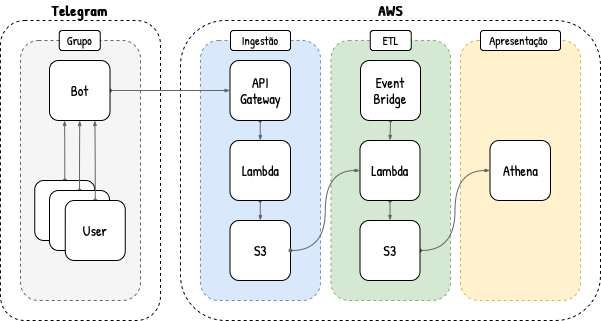

*A imagem abaixo demonstra todo o fluxo do pipeline de dados. ( cedida para uso pelo professor André Perez).*

**Telegram**

O Telegram representa a fonte de dados transacionais. Mensagens enviadas por usuários em um grupo são capturadas por um bot e redirecionadas via webhook do backend do aplicativo para um endpoint (endereço web que aceita requisições HTTP) exposto pelo AWS API Gateway. As mensagens trafegam no corpo ou payload da requisição.



**AWS | Ingestão**

Uma requisição HTTP com o conteúdo da mensagem em seu payload é recebia pelo AWS API Gateway que, por sua vez, as redireciona para o AWS Lambda, servindo assim como seu gatilho. Já o AWS Lambda recebe o payload da requisição em seu parâmetro event, salva o conteúdo em um arquivo no formato JSON (original, mesmo que o payload) e o armazena no AWS S3 particionado por dia.



**AWS | ETL**

Uma vez ao dia, o AWS Event Bridge aciona o AWS Lambda que processa todas as mensagens do dia anterior (atraso de um dia ou D-1), denormaliza o dado semi-estruturado típico de arquivos no formato JSON, salva o conteúdo processado em um arquivo no formato Apache Parquet e o armazena no AWS S3 particionado por dia.



**AWS | Apresentação**

Por fim, uma tabela do AWS Athena é apontada para o bucket do AWS S3 que armazena o dado processado: denormalizado, particionado e orientado a coluna. Profissionais de dados podem então executar consultas analíticas (agregações, ordenações, etc.) na tabela utilizando o SQL para a extração de insights.

## 2\. Telegram

O **Telegram** representa a fonte transacional de dados do nosso *pipeline* de dados. Nesta etapa, vamos criar um grupo, criar um **bot** e adiciona-lo ao grupo recém criado. O *bot* então captará **todas** as mensagens enviadas no grupo. As mensagens pode ser acessadas através da API (*application programming interface*) de *bots* dos **Telegram**


### **2.1. Bot**

2.1.1. Crie uma conta no **Telegram** caso não possua uma e faça o login na versão web da ferramenta através desse [link](https://web.telegram.org).

2.1.2. Crie um *bot*

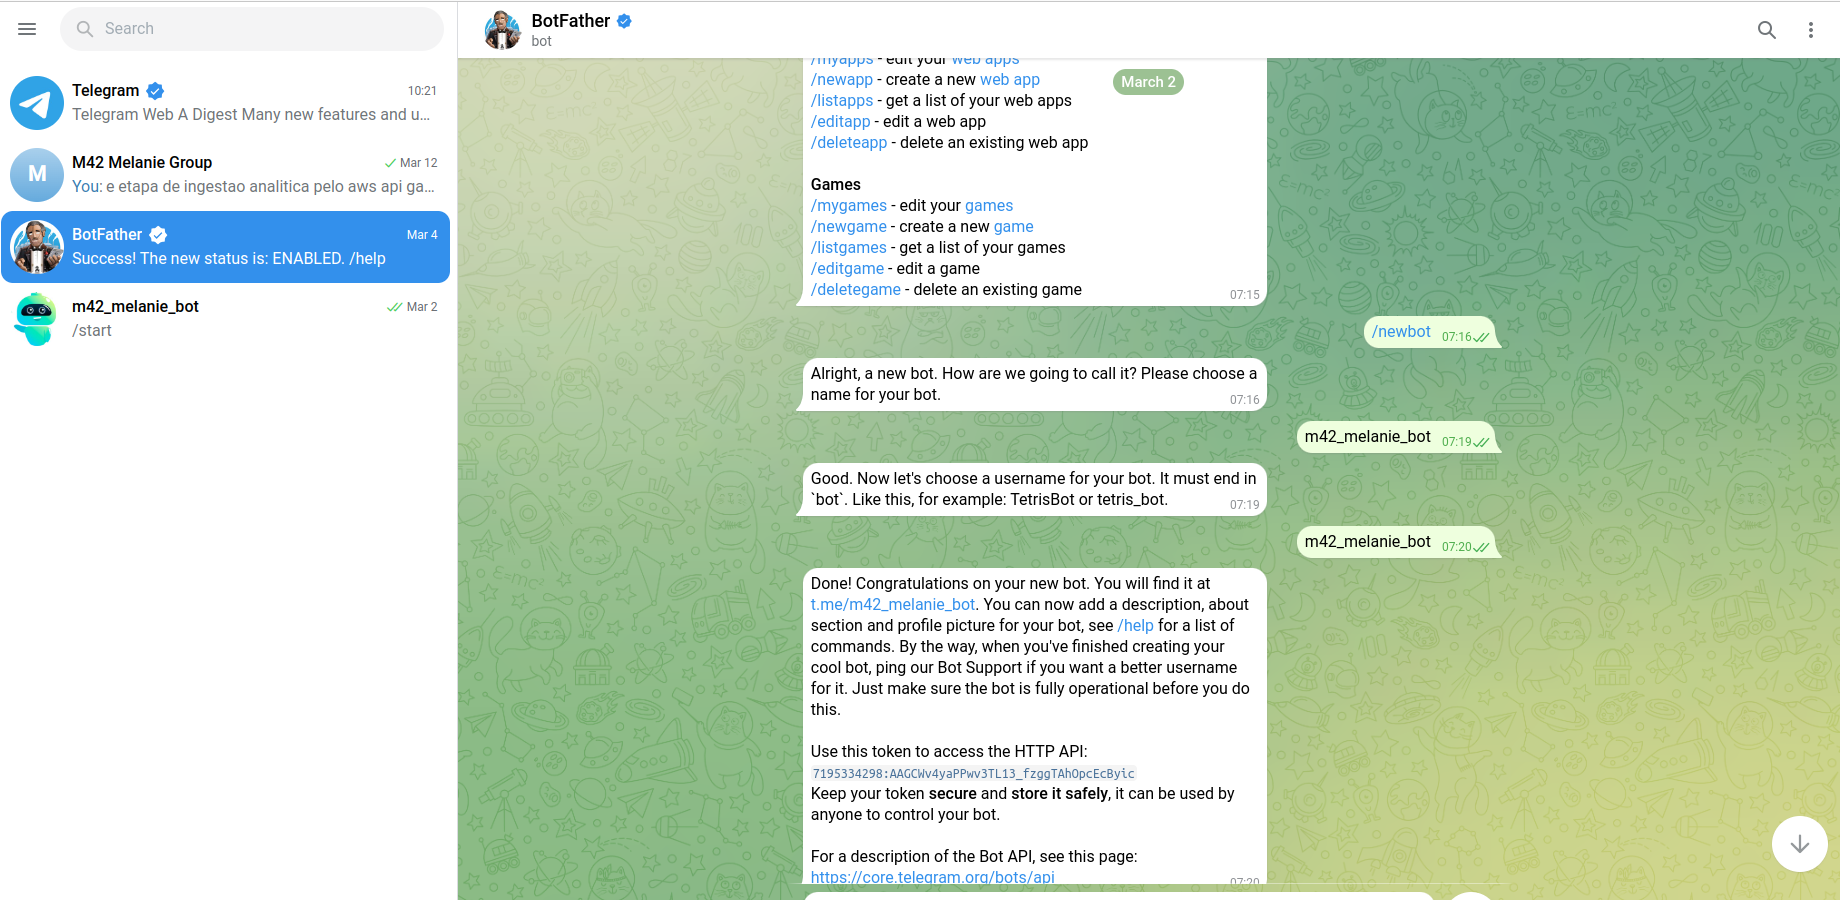

Para criar um *bot*:

1. Abra o *chat* com o `BotFather`;
1. Digite `/newbot`;
1. Digite o nome do *bot*;
1. Digite o nome de usuário do *bot* (precisa terminar com sufixo `_bot`);
1. Salve o `token` de acesso a API HTTP em um <font color='red'>local seguro</font>.

Para conferir o *token* novamente:

1. Abra o *chat* com o `BotFather`;
1. Digite `/mybots`;
1. Selecione o *bot* pelo seu nome de usuário;
1. Selecione `API Token`.

Por fim, precisamos ativiar o *bot*.

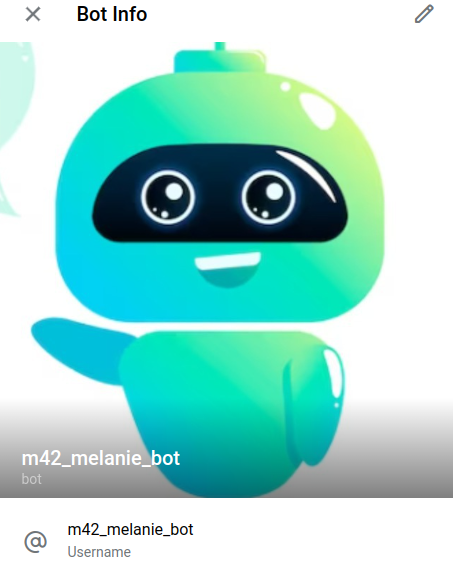

1. Abra o *chat* com o *bot*;
1. Selecione `start`.

### **2.2. Grupo**

2.2.1. Crie um grupo e adicione o *bot*

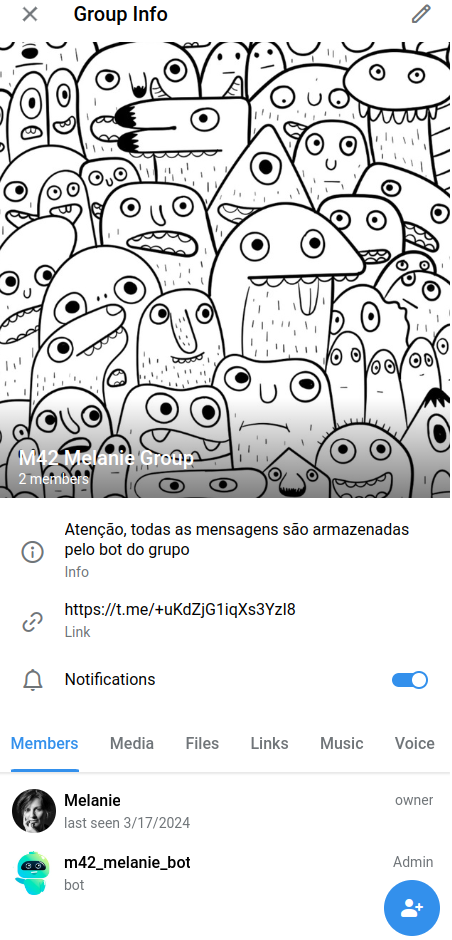

Para criar um novo grupo.

1. Aperte o botão com o ícone de um lápis;
1. Selecione `New Group`;
1. Busque e selecione o *bot* recém criado pelo seu nome;
1. Aperte o botão com o ícone de uma seta;
1. Digite o nome do grupo.


2.2.2. Torne o *bot* administrador do grupo.

Com o grupo criado, vamos adicionar o *bot* como administrador para que ele possa receber todas as mensagens do grupo. Uma outra opção seria desabilitar o seu modo de privacidade.

1. Abra o *chat* do grupo recém criado;
1. Abra o perfil do grupo;
1. Aperte o botão com o ícone de um lápis;
1. No campo de descrição do grupo escreva: **Atenção, todas as mensagens são armazenadas pelo *bot* do grupo**;
1. Selecione Administrators;
1. Aperte o botão com o ícone de um usuário;
1. Selecione o *bot*.
1. Aperte o botão com o ícone de um *check*.


2.2.3. Desabilite a opção de adicionar o *bot* a novos grupos.

Por fim, vamos configurar o *bot* para que ele não possa ser adicionado a outros grupos.

1. Abra o *chat* com o `BotFather`;
1. Digite `/mybots`;
1. Selecione o *bot* pelo seu nome de usuário;
1. Selecione `Bot Settings`;
1. Selecione `Allow Groups?`;
1. Selecione `Turn groups off`.

### **2.3. Bot API**

As mensagens captadas por um *bot* podem ser acessadas via API. A única informação necessária é o `token` de acesso fornecido pelo `BotFather` na criação do *bot*.

> **Nota:** A documentação completa da API pode ser encontrada neste [link](https://core.telegram.org/bots/api)

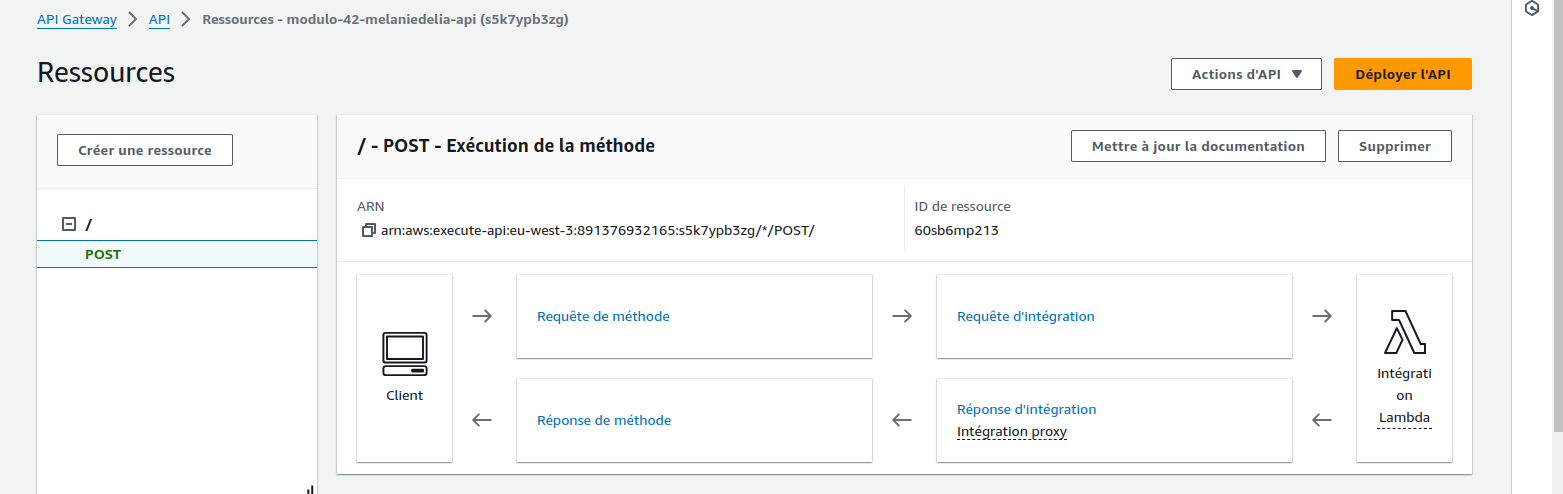

In [ ]:
from getpass import getpass

token = getpass()

··········


A `url` base é comum a todos os métodos da API.

In [ ]:
import json

import requests

base_url = f'https://api.telegram.org/bot{token}'

- **getMe**

O método `getMe` retorna informações sobre o *bot*.

In [ ]:
response = requests.get(url=f'{base_url}/getMe')
print(f'{base_url}/getMe')

print(json.dumps(json.loads(response.text), indent=2))

https://api.telegram.org/bot7195334298:AAGCWv4yaPPwv3TL13_fzggTAhOpcEcByic/getMe
{
  "ok": true,
  "result": {
    "id": 7195334298,
    "is_bot": true,
    "first_name": "m42_melanie_bot",
    "username": "m42_melanie_bot",
    "can_join_groups": true,
    "can_read_all_group_messages": false,
    "supports_inline_queries": false
  }
}


 - **getUpdates**

O método `getMe` retorna as mensagens captadas pelo *bot*.

In [ ]:
response = requests.get(url=f'{base_url}/getUpdates')

print(json.dumps(json.loads(response.text), indent=2))

{
  "ok": true,
  "result": [
    {
      "update_id": 900748658,
      "message": {
        "message_id": 9,
        "from": {
          "id": 7165198080,
          "is_bot": false,
          "first_name": "Melanie",
          "language_code": "en"
        },
        "chat": {
          "id": -1002006287666,
          "title": "M42 Melanie Group",
          "type": "supergroup"
        },
        "date": 1710247693,
        "text": "Ol\u00e0, mundo!"
      }
    },
    {
      "update_id": 900748659,
      "message": {
        "message_id": 10,
        "from": {
          "id": 7165198080,
          "is_bot": false,
          "first_name": "Melanie",
          "language_code": "en"
        },
        "chat": {
          "id": -1002006287666,
          "title": "M42 Melanie Group",
          "type": "supergroup"
        },
        "date": 1710247699,
        "text": "12-03, estou come\u00e7ando o exerc\u00edcio novamente"
      }
    },
    {
      "update_id": 900748660,
      "messag

## 3\. Dados

### **3.1. Mensagem**

Uma mensagem recuperada via API é um dado semi-estruturado no formato JSON com algumas chaves mandatórias e diversas chaves opcionais, estas últimas presentes (ou não) dependendo do tipo da mensagem. Por exemplo, mensagens de texto apresentam a chave `text` enquanto mensagens de áudio apresentam a chave `audio`. Neste projeto vamos focar em mensagens do tipo texto, ou seja, vamos ingerir as chaves mandatórias e a chave `text`.

### **3.2. Ingestão**

A etapa de **ingestão** é responsável, como seu o próprio nome diz, pela ingestão dos dados transacionais em ambientes analíticos. De maneira geral, o dado ingerido é persistido no formato mais próximo do original, ou seja, nenhuma transformação é realizada em seu conteúdo ou estrutura (*schema*). Como exemplo, dados de uma API *web* que segue o formato REST (*representational state transfer*) são entregues, logo, persistidos, no formato JSON.

> Persistir os dados em seu formato original trás muitas vantagens, como a possibilidade de reprocessamento.

Pode ser conduzida de duas formas:

 - **Batch**: blocos de dados são ingeridos em uma frequência bem definida, geralmente na escala de horas ou dias;
 - **Streaming**: dados são ingeridos conforme são produzidos e disponibilizados.

No projeto, as mensagens capturadas pelo *bot* podem ser ingeridas através da API *web* de *bots* do **Telegram**, portanto são fornecidos no formato JSON. Como o **Telegram** retem mensagens por apenas 24h em seus servidores, a ingestão via **streaming** é a mais indicada. Para que seja possível esse tipo de **ingestão** seja possível, vamos utilizar um *webhook* (gancho *web*), ou seja, vamos redirecionar as mensagens automaticamente para outra API *web*.

Sendo assim, precisamos de um serviço da AWS que forneça um API *web* para receber os dados redirecionados, o `AWS API Gateway`. Dentre suas diversas funcionalidades, o `AWS API Gateway` permite o redirecionamento do dado recebido para outros serviços da AWS. Logo, vamos conecta-lo ao `AWS Lambda`, que pode sua vez, irá armazenar o dado em seu formato original (JSON) em um *bucket* do `AWS S3`.

> Sistemas que reagem a eventos são conhecidos como *event-driven*.

Portanto, precisamos:

 - Criar um *bucket* no `AWS S3`;
 - Criar uma função no `AWS Lambda`;
 - Criar uma API *web* no `AWS API Gateway`;
 - Configurar o *webhook* da API de *bots* do **Telegram**.

### **3.3. AWS S3**

Na etapa de **ingestão**, o `AWS S3` tem a função de passivamente armazenar as mensagens captadas pelo *bot* do **Telegram** no seu formato original: JSON. Para tanto, basta a criação de um *bucket*. Como padrão, vamos adicionar o sufixo `-raw` ao seu nome (vamos seguir esse padrão para todos os serviços desta camada).

> **Nota**: um `data lake` é o nome dado a um repositório de um grande volume dados. É organizado em zonas que armazenam replicadas dos dados em diferentes níveis de processamento. A nomenclatura das zonas varia, contudo, as mais comuns são: *raw* e *enriched* ou *bronze*, *silver* e *gold*.

### **3.4. AWS Lambda**

Na etapa de **ingestão**, o `AWS Lambda` tem a função de ativamente persistir as mensagens captadas pelo *bot* do **Telegram** em um *bucket* do `AWS S3`. Para tanto vamos criar uma função que opera da seguinte forma:

 - Recebe a mensagem no parâmetro `event`;
 - Verifica se a mensagem tem origem no grupo do **Telegram** correto;
 - Persiste a mensagem no formato JSON no *bucket* do `AWS S3`;
 - Retorna uma mensagem de sucesso (código de retorno HTTP igual a 200) a API de *bots* do **Telegram**.

> **Nota**: No **Telegram**, restringimos a opção de adicionar o *bot* a grupos, contudo, ainda é possível iniciar uma conversa em um *chat* privado.

O código da função:

In [ ]:
import os
import json
import logging
from datetime import datetime, timezone, timedelta #add timedelta

import boto3


def lambda_handler(event: dict, context: dict) -> dict:

  '''
  Recebe uma mensagens do Telegram via AWS API Gateway, verifica no
  seu conteúdo se foi produzida em um determinado grupo e a escreve,
  em seu formato original JSON, em um bucket do AWS S3.
  '''

  # vars de ambiente

  BUCKET = os.environ['AWS_S3_BUCKET']
  TELEGRAM_CHAT_ID = int(os.environ['TELEGRAM_CHAT_ID'])

  # vars lógicas

  tzinfo = timezone(offset=timedelta(hours=-3))
  date = datetime.now(tzinfo).strftime('%Y-%m-%d')
  timestamp = datetime.now(tzinfo).strftime('%Y%m%d%H%M%S%f')

  filename = f'{timestamp}.json'

  # código principal

  client = boto3.client('s3')

  try:

    message = json.loads(event["body"])
    chat_id = message["message"]["chat"]["id"]

    if chat_id == TELEGRAM_CHAT_ID:

      with open(f"/tmp/{filename}", mode='w', encoding='utf8') as fp:
        json.dump(message, fp)

      client.upload_file(f'/tmp/{filename}', BUCKET, f'telegram/context_date={date}/{filename}')

  except Exception as exc:
      logging.error(msg=exc)
      return dict(statusCode="500")

  else:
      return dict(statusCode="200")

Para que a função funcione corretamente, algumas configurações precisam ser realizadas.

 - **Variáveis de ambiente**

Note que o código exige a configuração de duas variáveis de ambiente: `AWS_S3_BUCKET` com o nome do *bucket* do `AWS S3` e `TELEGRAM_CHAT_ID` com o id do *chat* do grupo do **Telegram**. Para adicionar variáveis de ambiente em uma função do `AWS Lambda`, basta acessar configurações -> variáveis de ambiente no console da função.

> **Nota**: Variáveis de ambiente são excelentes formas de armazenar informações sensíveis.

 - **Permissão**

Por fim, precisamos adicionar a permissão de escrita no *bucket* do `AWS S3` para a função do `AWS Lambda` no `AWS IAM`.

### **3.5. AWS API Gateway**

Na etapa de **ingestão**, o `AWS API Gateway` tem a função de receber as mensagens captadas pelo *bot* do **Telegram**, enviadas via *webhook*, e iniciar uma função do `AWS Lambda`, passando o conteúdo da mensagem no seu parâmetro *event*. Para tanto vamos criar uma API e configurá-la como gatilho da função do `AWS Lambda`:

 - Acesse o serviço e selecione: *Create API* -> *REST API*;
 - Insira um nome, como padrão, um que termine com o sufixo `-api`;
 - Selecione: *Actions* -> *Create Method* -> *POST*;
 - Na tela de *setup*:
  - Selecione *Integration type* igual a *Lambda Function*;
  - Habilite o *Use Lambda Proxy integration*;
  - Busque pelo nome a função do `AWS Lambda`.


Podemos testar a integração com o `AWS Lambda` através da ferramenta de testes do serviço. Por fim, vamos fazer a implantação da API e obter o seu endereço *web*.

 - Selecione: *Actions* -> *Deploy API*;
 - Selecione: *New Stage* para *Deployment stage*;
 - Adicione *dev* como `Stage name`.

Copie o a `url` gerada na variável `aws_api_gateway_url`.

In [ ]:
aws_api_gateway_url = getpass()

··········


### **3.6. Telegram**

Vamos configurar o *webhook* para redirecionar as mensagens para a `url` do `AWS API Gateway`.

 - **setWebhook**

O método `setWebhook` configura o redirecionamento das mensagens captadas pelo *bot* para o endereço *web* do paramametro `url`.

> **Nota**: os métodos `getUpdates` e `setWebhook` são mutualmente exclusivos, ou seja, enquanto o *webhook* estiver ativo, o método `getUpdates` não funcionará. Para desativar o *webhook*, basta utilizar o método `deleteWebhook`.

In [ ]:
response = requests.get(url=f'{base_url}/setWebhook?url={aws_api_gateway_url}')

print(json.dumps(json.loads(response.text), indent=2))

{
  "ok": true,
  "result": true,
  "description": "Webhook was set"
}


 - **getWebhookInfo**

O método `getWebhookInfo` retorna as informações sobre o *webhook* configurado.

In [ ]:
response = requests.get(url=f'{base_url}/getWebhookInfo')

print(json.dumps(json.loads(response.text), indent=2))

{
  "ok": true,
  "result": {
    "url": "https://s5k7ypb3zg.execute-api.eu-west-3.amazonaws.com/dev",
    "has_custom_certificate": false,
    "pending_update_count": 0,
    "max_connections": 40,
    "ip_address": "13.37.98.15"
  }
}


## 4\. ETL

A etapa de **extração, transformação e carregamento** (do inglês *extraction, transformation and load* ou **ETL**) é uma etapa abrangente responsável pela manipulação dos dados ingeridos de sistemas transacionais, ou seja, já persistidos em camadas cruas ou *raw* de sistemas analíticos. Os processos conduzidos nesta etapa variam bastante de acordo com a área da empresa, do volume/variedade/velocidade do dado consumido, etc. Contudo, em geral, o dado cru ingerido passa por um processo recorrente de *data wrangling* onde o dado é limpo, deduplicado, etc. e persistido com técnicas de particionamento, orientação a coluna e compressão. Por fim, o dado processado está pronto para ser analisado por profissionais de dados.

No projeto, as mensagens de um único dia, persistidas na camada cru, serão compactas em um único arquivo, orientado a coluna e comprimido, que será persistido em uma camada enriquecida. Além disso, durante este processo, o dado também passará por etapas de *data wrangling*.

Para isso, vamos utilizar uma função do `AWS Lambda` como motor de processamento e um *bucket* do `AWS S3` como camada enriquecida para a persistência do dado processado. Para garantir a recorrência, vamos configurar uma regra do `AWS Event Bridge` como gatilho diáro da função.

### **4.1. AWS S3**

Na etapa de **ETL**, o `AWS S3` tem a função de passivamente armazenar as mensagens processadas de um dia em um único arquivo no formato Parquet. Para tanto, basta a criação de um *bucket*. Como padrão, vamos adicionar o sufixo `-enriched` ao seu nome (vamos seguir esse padrão para todos os serviços desta camada).

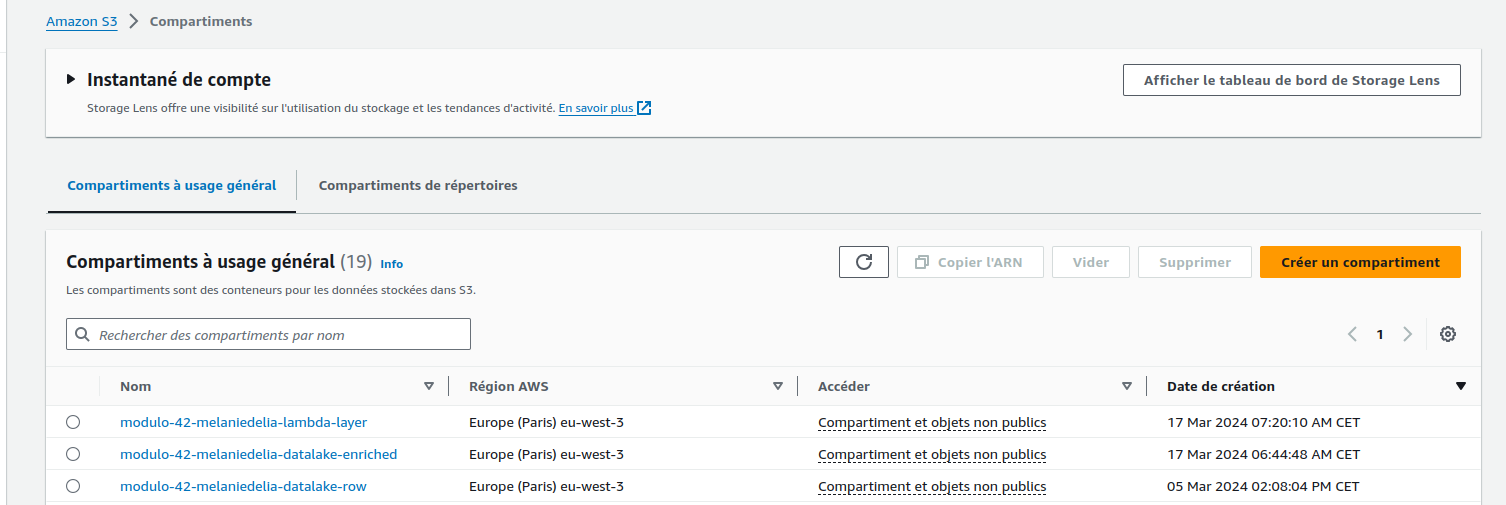

### **4.2. AWS Lambda**

Na etapa de **ETL**, o `AWS Lambda` tem a função de ativamente processar as mensagens captadas pelo *bot* do **Telegram**, persistidas na camada cru no *bucket* do `AWS S3`, e persisti-las na camada enriquecida, também em um *bucket* do `AWS S3`. Logo, vamos criar uma função que opera da seguinte forma:

 - Lista todos os arquivos JSON de uma única participação da camada crua de um *bucket* do `AWS S3`;
 - Para cada arquivo listado:
  - Faz o *download* do arquivo e carrega o conteúdo da mensagem;
  - Executa uma função de *data wrangling*;
  - Cria uma tabela do PyArrow e a contatena com as demais.
 - Persiste a tabela no formato Parquet na camada enriquecida em um *bucket* do `AWS S3`.

> **Nota**: O fato de utilizarmos duas camadas de armazenamento e processamento, permite que possamos reprocessar os dados crus de diversas maneiras, quantas vezes forem preciso.

> **Nota**: Atente-se ao fato de que a função processa as mensagens do dia anterior (D-1).

O código da função:

In [ ]:
import os
import json
import logging
from datetime import datetime, timedelta, timezone

import boto3
import pyarrow as pa
import pyarrow.parquet as pq


def lambda_handler(event: dict, context: dict) -> bool:

  '''
  Diariamente é executado para compactar as diversas mensagensm, no formato
  JSON, do dia anterior, armazenadas no bucket de dados cru, em um único
  arquivo no formato PARQUET, armazenando-o no bucket de dados enriquecidos
  '''

  # vars de ambiente

  RAW_BUCKET = os.environ['AWS_S3_BUCKET']
  ENRICHED_BUCKET = os.environ['AWS_S3_ENRICHED']

  # vars lógicas

  tzinfo = timezone(offset=timedelta(hours=+2)) # Paris Europa - horário de verão
  date = (datetime.now(tzinfo) - timedelta(days=1)).strftime('%Y-%m-%d')
  timestamp = datetime.now(tzinfo).strftime('%Y%m%d%H%M%S%f')

  # código principal

  table = None
  client = boto3.client('s3')

  try:

      response = client.list_objects_v2(Bucket=RAW_BUCKET, Prefix=f'telegram/context_date={date}')

      for content in response['Contents']:

        key = content['Key']
        client.download_file(RAW_BUCKET, key, f"/tmp/{key.split('/')[-1]}")

        with open(f"/tmp/{key.split('/')[-1]}", mode='r', encoding='utf8') as fp:

          data = json.load(fp)
          data = data["message"]

        parsed_data = parse_data(data=data)
        iter_table = pa.Table.from_pydict(mapping=parsed_data)

        if table:

          table = pa.concat_tables([table, iter_table])

        else:

          table = iter_table
          iter_table = None

      pq.write_table(table=table, where=f'/tmp/{timestamp}.parquet')
      client.upload_file(f"/tmp/{timestamp}.parquet", ENRICHED_BUCKET, f"telegram/context_date={date}/{timestamp}.parquet")

      return True

  except Exception as exc:
      logging.error(msg=exc)
      return False

O código da função de *data wrangling*:

In [ ]:
def parse_data(data: dict) -> dict:

  date = datetime.now().strftime('%Y-%m-%d')
  timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')

  parsed_data = dict()

  for key, value in data.items():

      if key == 'from':
          for k, v in data[key].items():
              if k in ['id', 'is_bot', 'first_name']:
                parsed_data[f"{key if key == 'chat' else 'user'}_{k}"] = [v]

      elif key == 'chat':
          for k, v in data[key].items():
              if k in ['id', 'type']:
                parsed_data[f"{key if key == 'chat' else 'user'}_{k}"] = [v]

      elif key in ['message_id', 'date', 'text']:
          parsed_data[key] = [value]

  if not 'text' in parsed_data.keys():
    parsed_data['text'] = [None]

  return parsed_data

Para que a função funcione corretamente, algumas configurações precisam ser realizadas.

**Variáveis de ambiente**

Note que o código exige a configuração de duas variáveis de ambiente: AWS_S3_BUCKET e AWS_S3_ENRICHED com os nomes dos bucket do AWS S3 da camada cru e enriquecida, respectivamente. Para adicionar variáveis de ambiente em uma função do AWS Lambda, basta acessar configurações -> variáveis de ambiente no console da função.

**Permissão**

Precisamos adicionar a permissão de escrita nos buckets do AWS S3 para a função do AWS Lambda no AWS IAM.

**Recursos**

O timeout padrão de funcões do AWS Lambda é de 3 segundos. Para a função, vamos aumentar o tempo para 5 minutos, principalmente para lidar com o IO (input/output) de arquivos do AWS S3.

**Camadas**


Por fim, note que o código da função utiliza o pacote Python PyArrow. Contudo, o ambiente padrão do `AWS Lambda` possui poucos pacotes externos instalado, como o pacote Python boto3, logo o PyArrow não será encontrado e a execução da função falhará. Existem algumas formas de adicionar pacotes externos no ambiente de execução do AWS Lambda, um deles é a criação de camadas ou *layers*, onde podemos fazer o *upload* dos pacotes Python direto na plataforma ou através de um *bucket* do `AWS S3`. Vamos então seguir com a última opção, onde teremos que:

 - Criar um *bucket* no `AWS S3`;
 - Fazer o *upload* do código do pacote Python do PyArrow (*download* neste [link](https://github.com/awslabs/aws-data-wrangler/releases));
 - Criar *layer* e conectar na função.

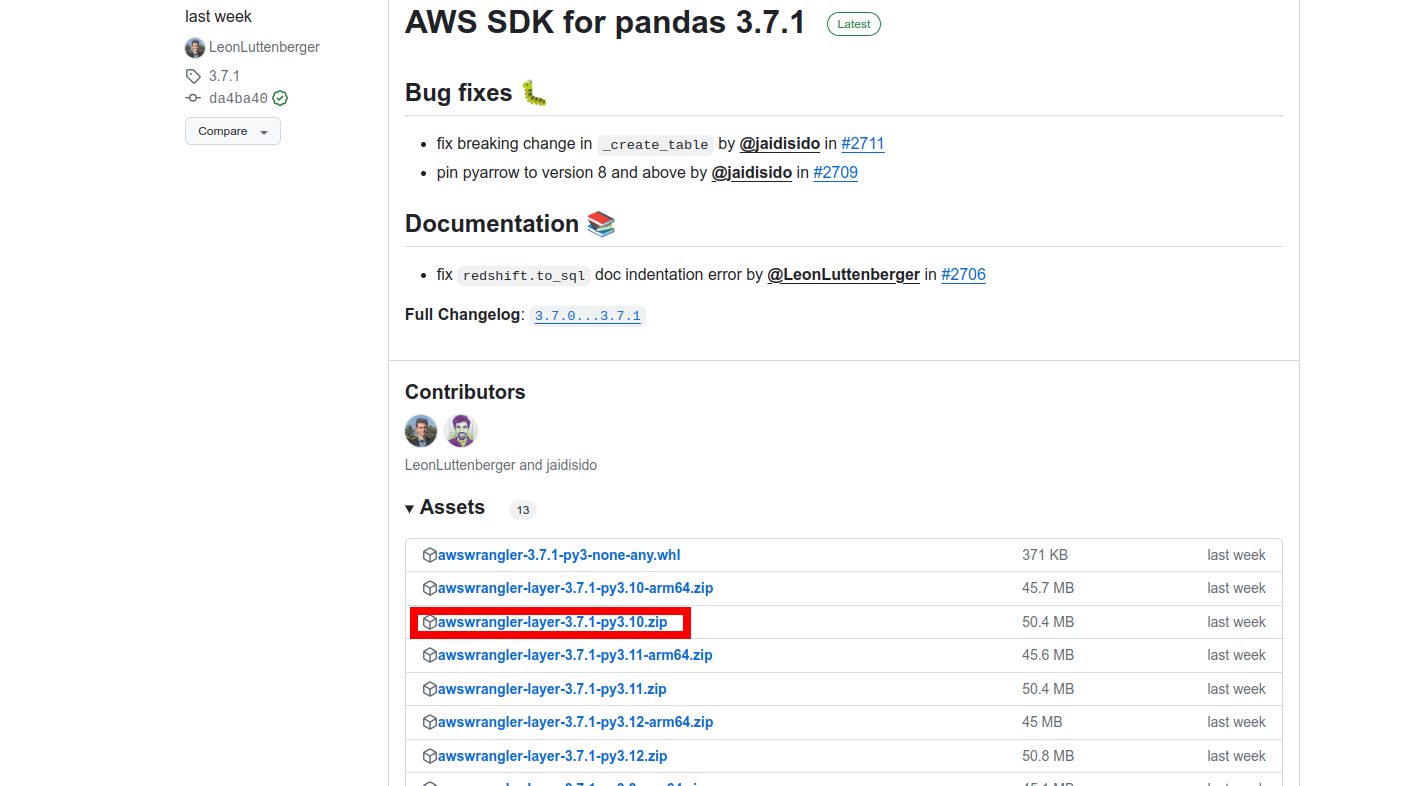

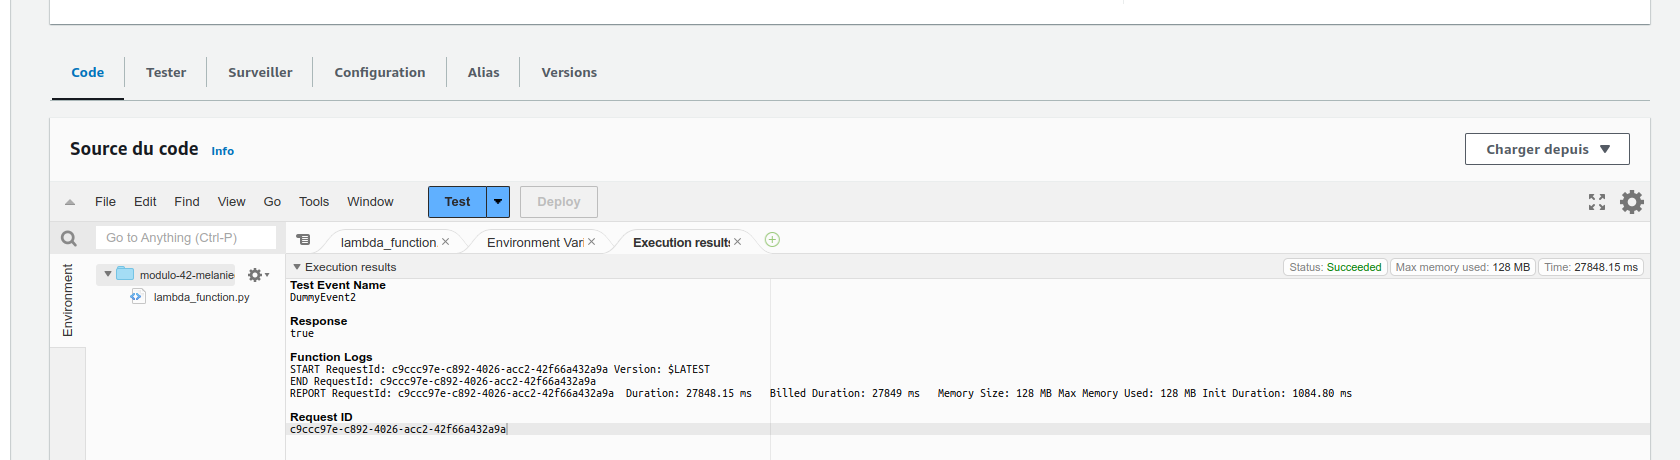

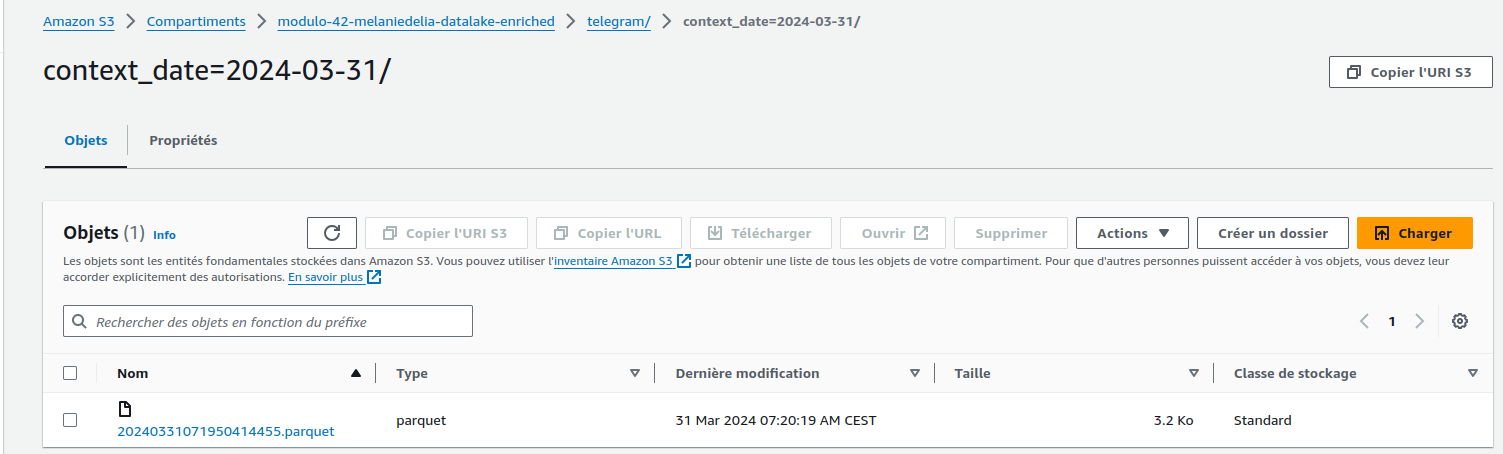

### **4.3. AWS Event Bridge**

Na etapa de **ETL**, o `AWS Event Bridge` tem a função de ativar diariamente a função de **ETL** do `AWS Lambda`, funcionando assim como um *scheduler*.

> **Nota**: Atente-se ao fato de que a função processa as mensagens do dia anterior (D-1).

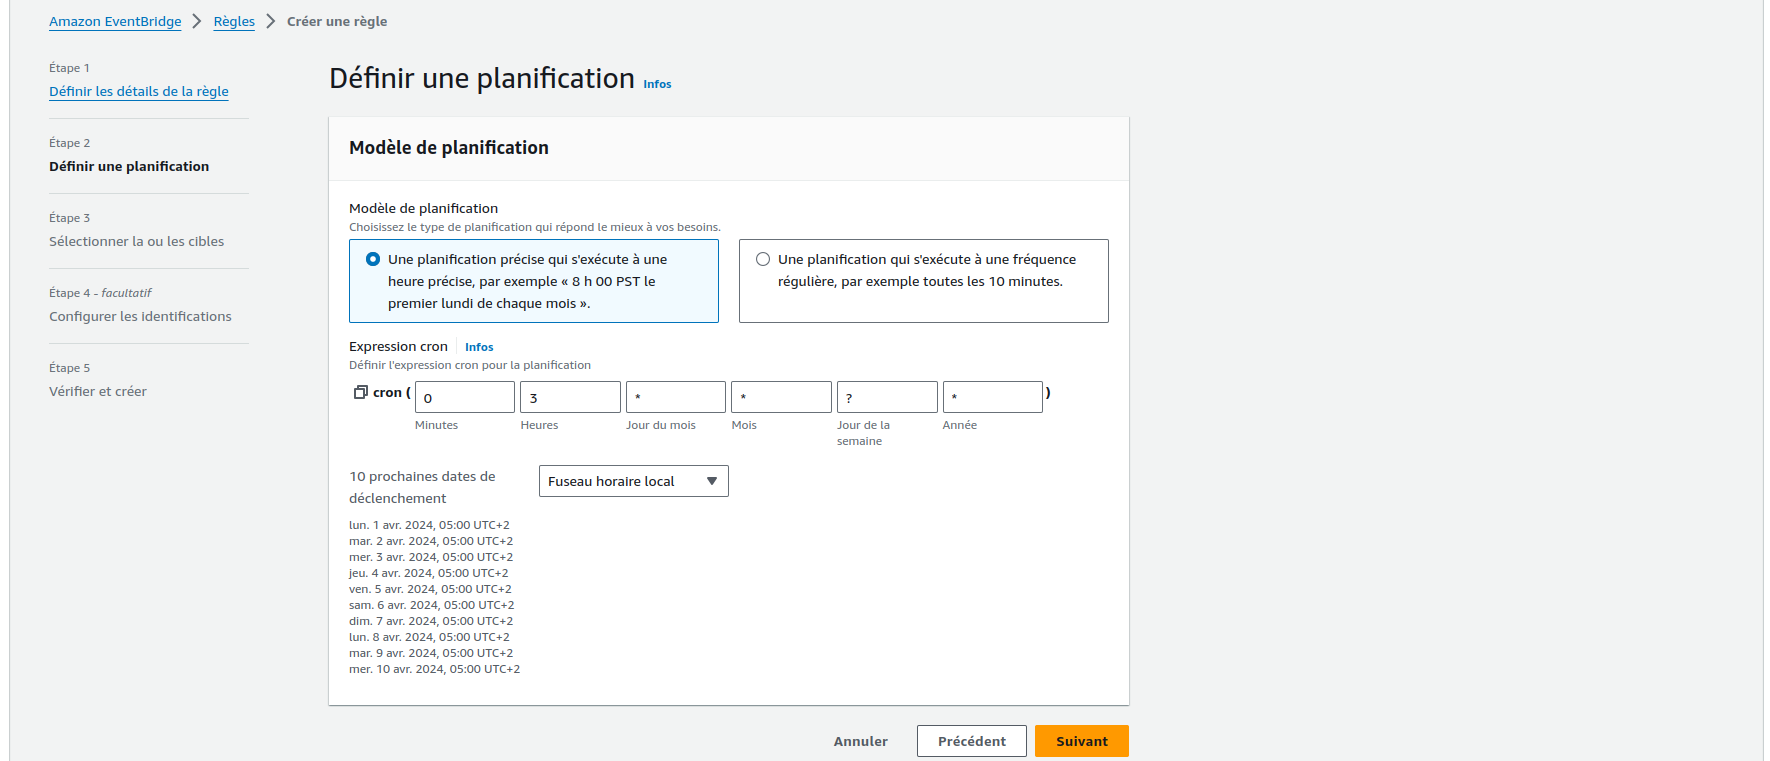

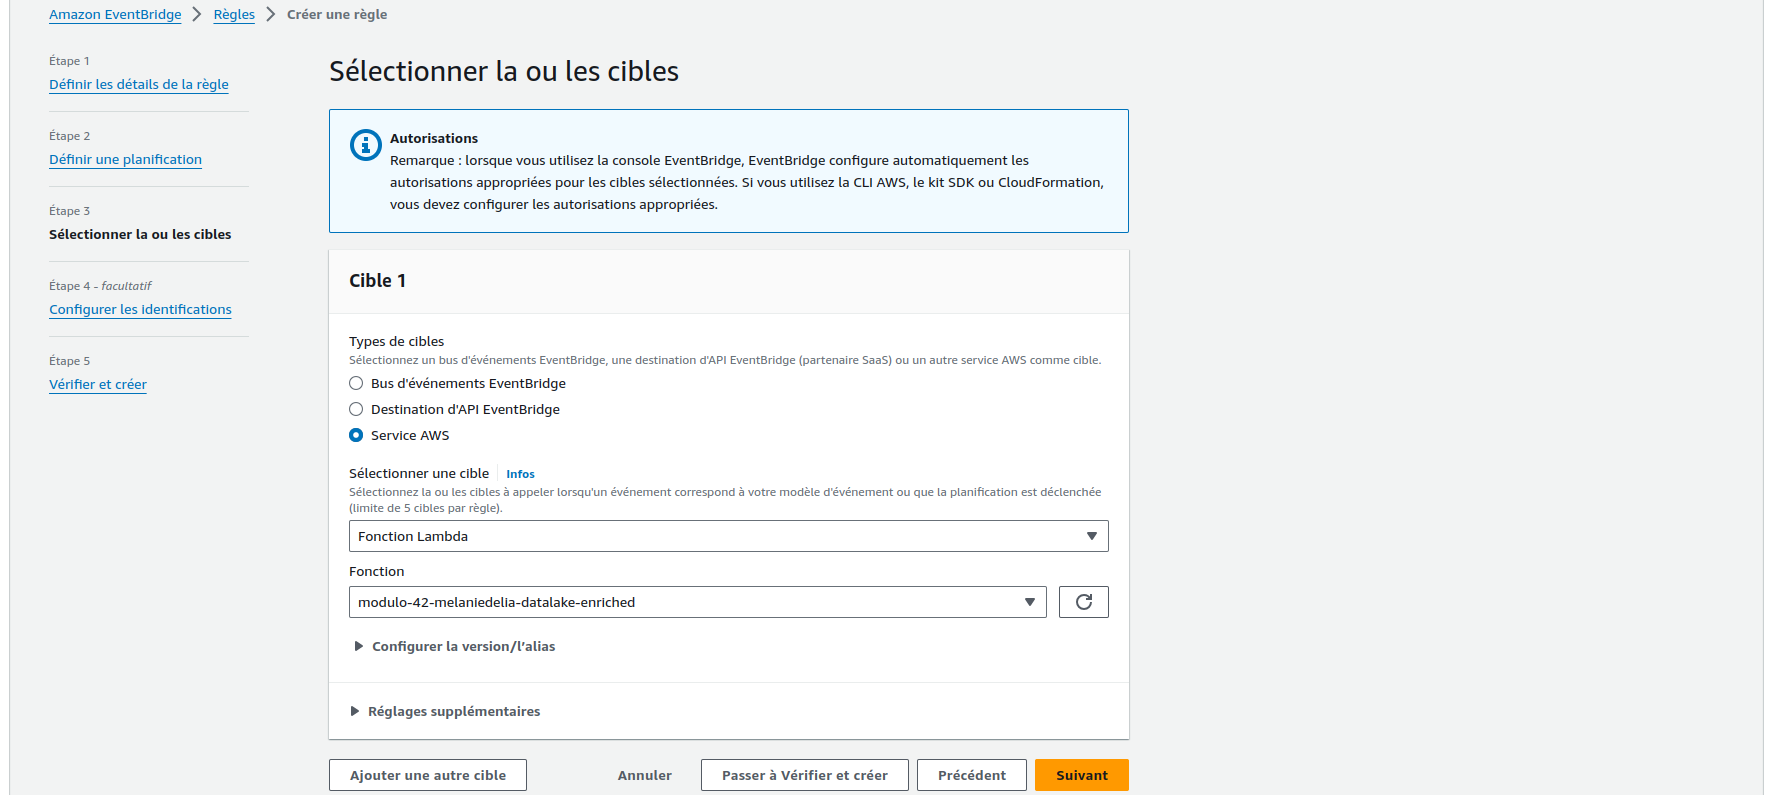

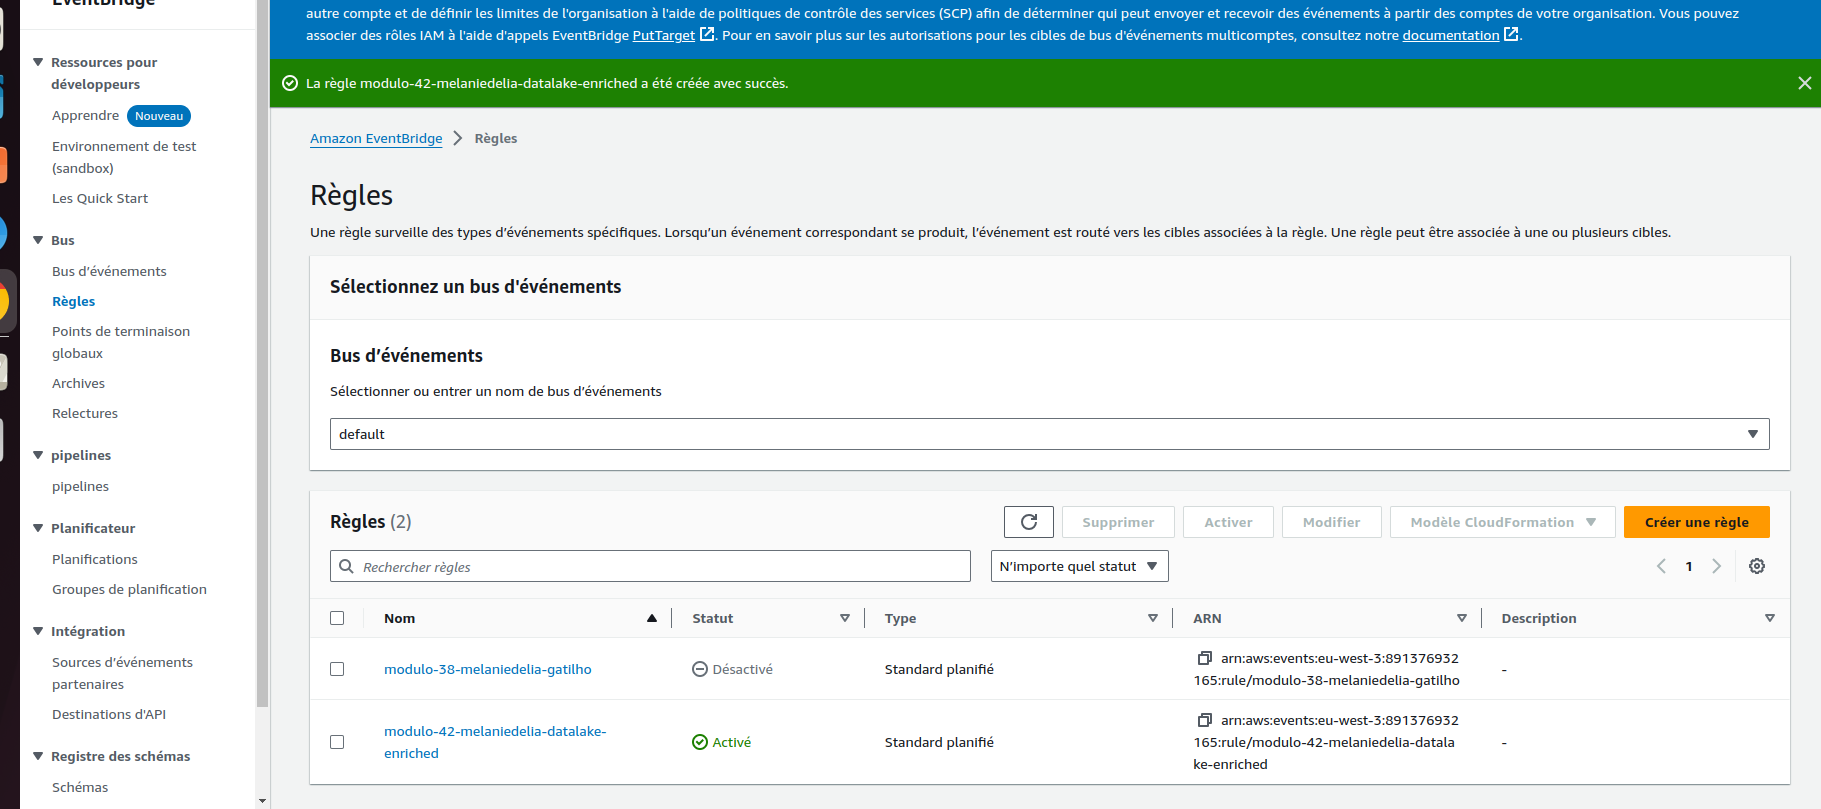

## 5\. Apresentação

A etapa de **apresentação** é reponsável por entregar o dado para os usuários (analistas, cientistas, etc.) e sistemas (dashboards, motores de consultas, etc.), idealmente através de uma interface de fácil uso, como o SQL, logo, essa é a única etapa que a maioria dos usuários terá acesso. Além disso, é importante que as ferramentas da etapa entregem dados armazenados em camadas refinadas, pois assim as consultas são mais baratas e o dados mais consistentes.

### **5.1. AWS Athena**

Na etapa de **apresentação**, o `AWS Athena` tem função de entregar o dados através de uma interface SQL para os usuários do sistema analítico. Para criar a interface, basta criar uma tabela externa sobre o dado armazenado na camada mais refinada da arquitetura, a camada enriquecida.

5.1.1. Cria a tabela no `AWS Athena` que aponte para os dados armazenados no bucket enriquecido do `AWS S3`.

```sql
CREATE EXTERNAL TABLE `telegram`(
  `message_id` bigint,
  `user_id` bigint,
  `user_is_bot` boolean,
  `user_first_name` string,
  `chat_id` bigint,
  `chat_type` string,
  `text` string,
  `date` bigint)
PARTITIONED BY (
  `context_date` date)
ROW FORMAT SERDE
  'org.apache.hadoop.hive.ql.io.parquet.serde.ParquetHiveSerDe'
STORED AS INPUTFORMAT
  'org.apache.hadoop.hive.ql.io.parquet.MapredParquetInputFormat'
OUTPUTFORMAT
  'org.apache.hadoop.hive.ql.io.parquet.MapredParquetOutputFormat'
LOCATION
  's3://modulo-42-melaniedelia-datalake-enriched/telegram/'
```

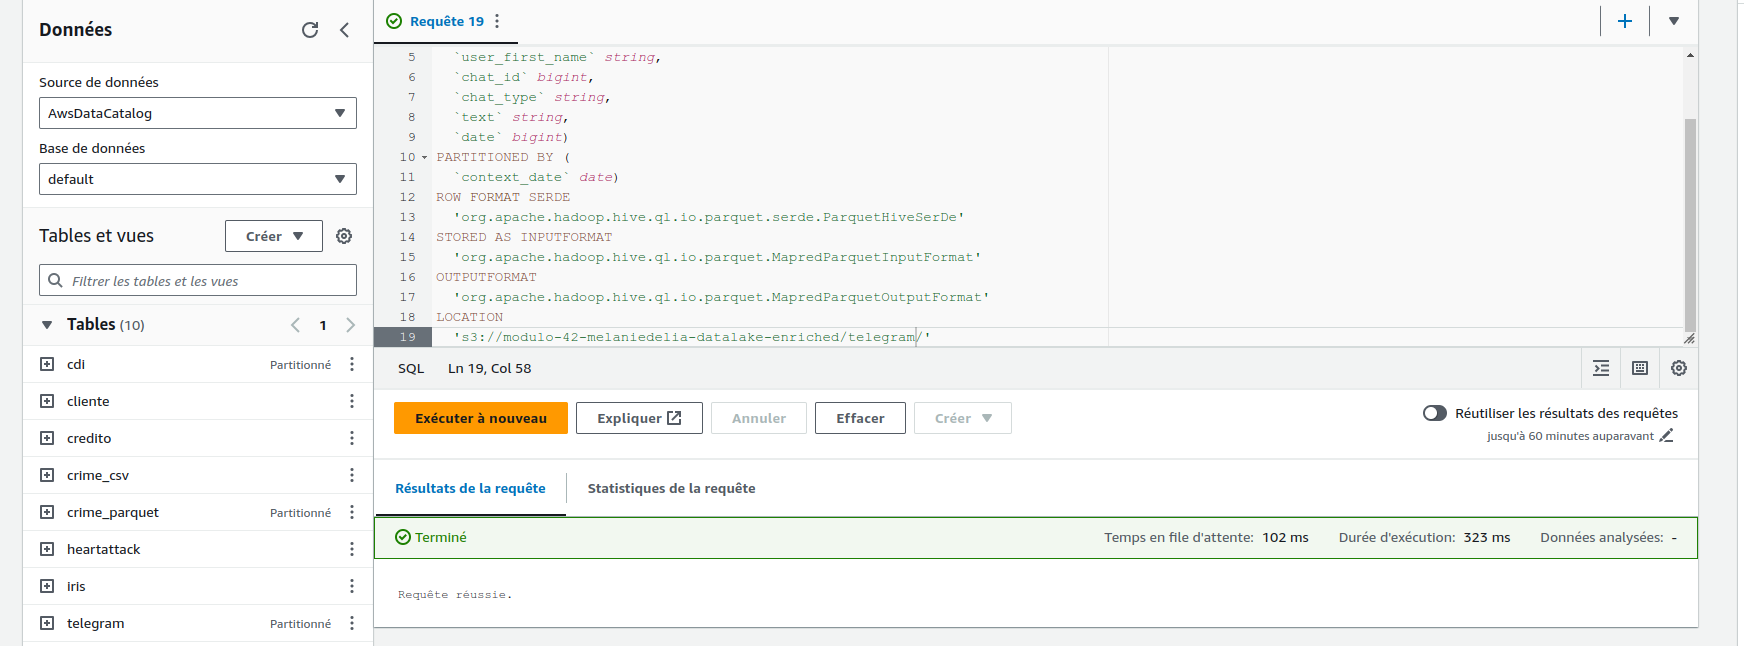

Por fim, adicione as partições disponíveis.

5.1.2. Execute o comando `MSCK REPAIR TABLE <nome-tabela>` para carregar as partições.

```sql
MSCK REPAIR TABLE `telegram`;
```

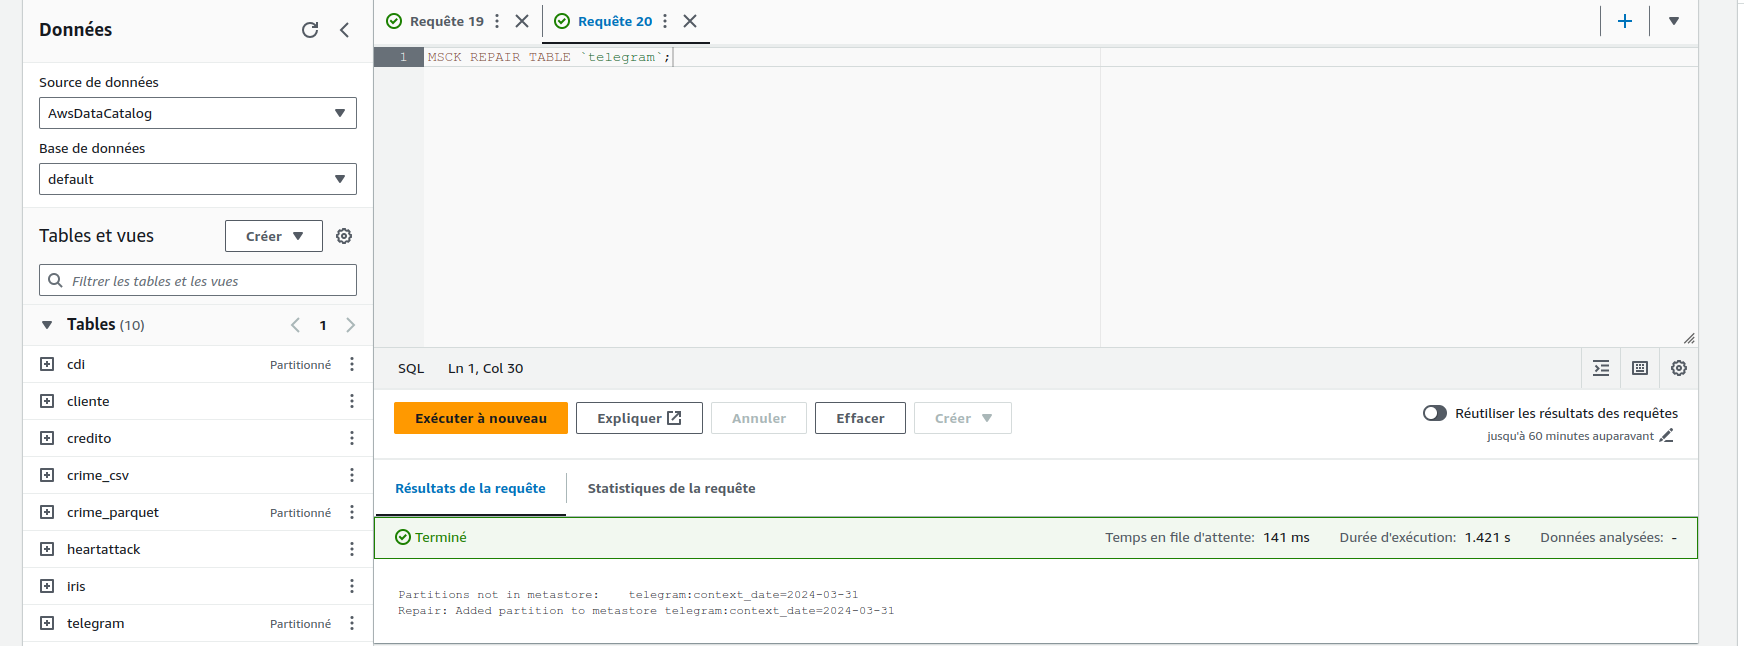

5.1.3. Execute as consultas SQL para explorar os dados.

E consulte as 10 primeiras linhas para observar o resultado.

```sql
SELECT * FROM "telegram" LIMIT 10;
```

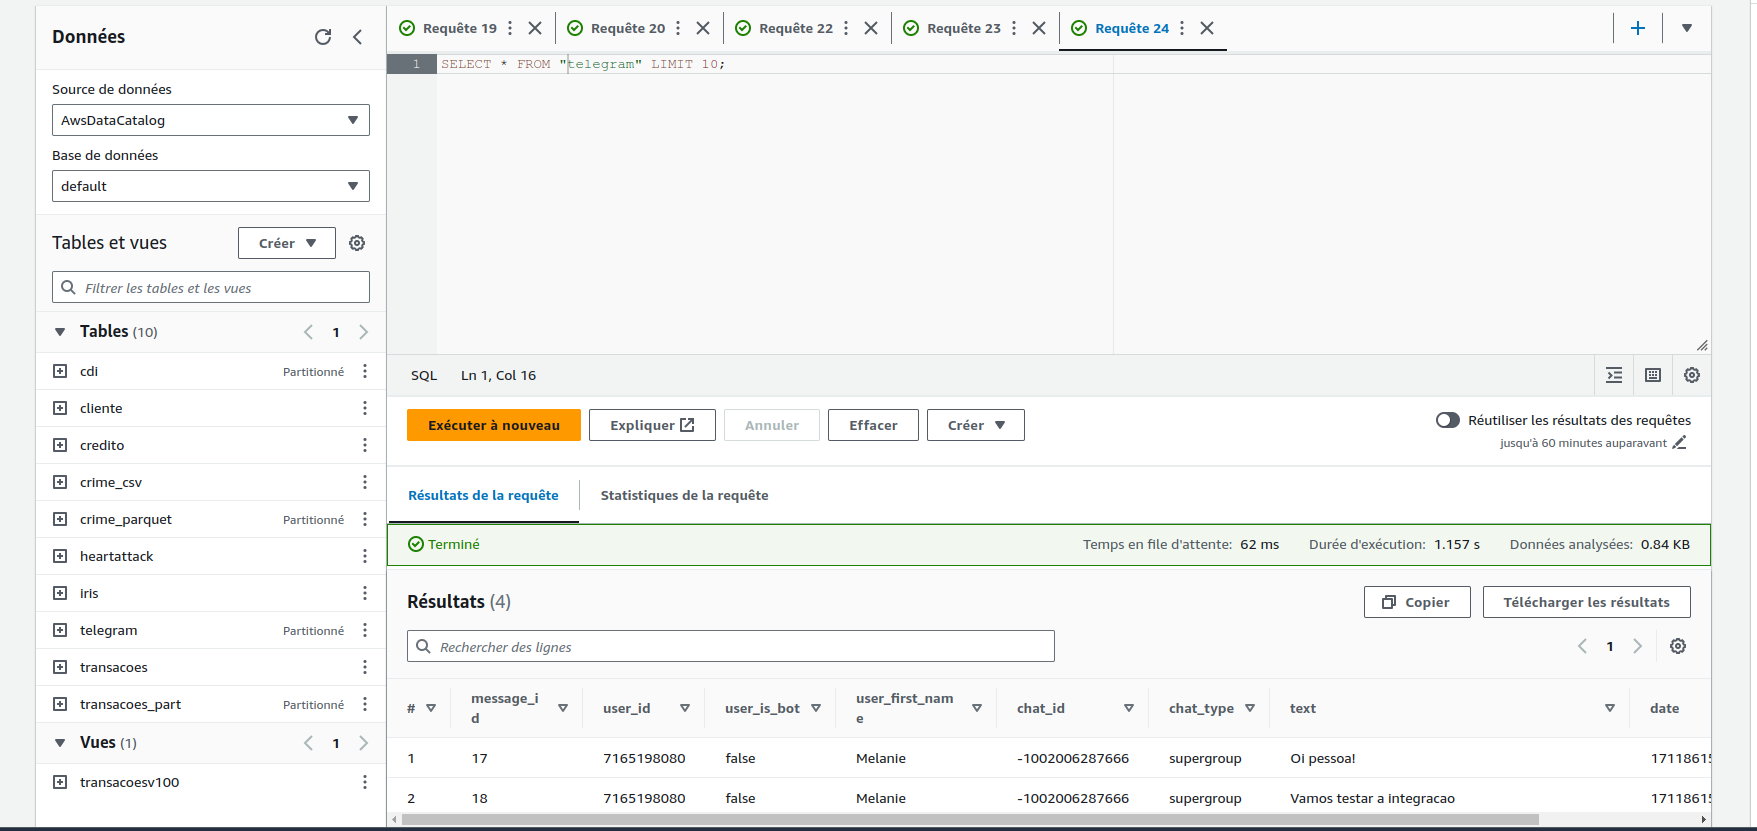

```sql
SELECT * FROM "telegram" ORDER BY message_id LIMIT 10;
```

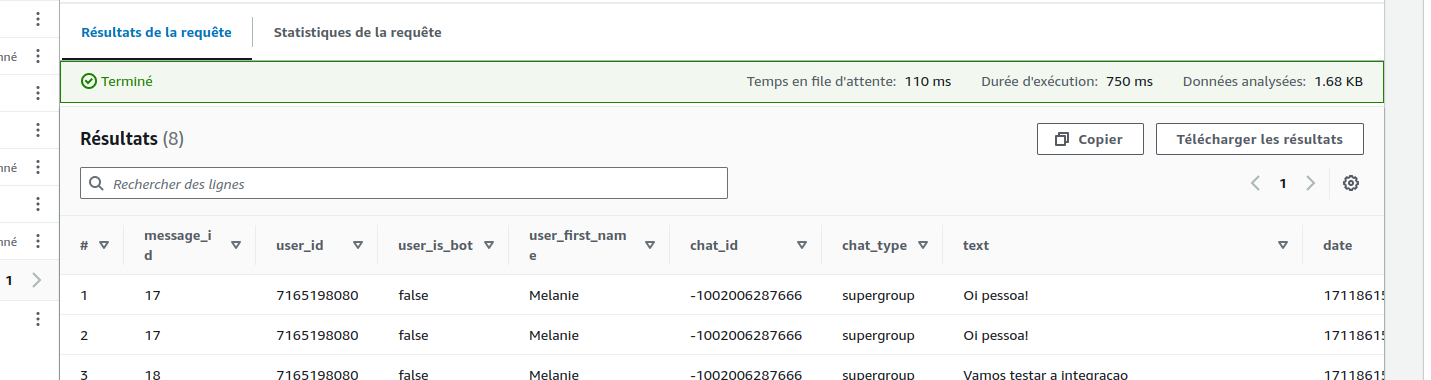

### **5.2. Analytics**

Com o dado disponível, usuário podem executar as mais variadas consultas analíticas. Seguem alguns exemplos:

- Quantidade de mensagens por dia.

```sql
SELECT
  context_date,
  count(1) AS "message_amount"
FROM "telegram"
GROUP BY context_date
ORDER BY context_date DESC
```

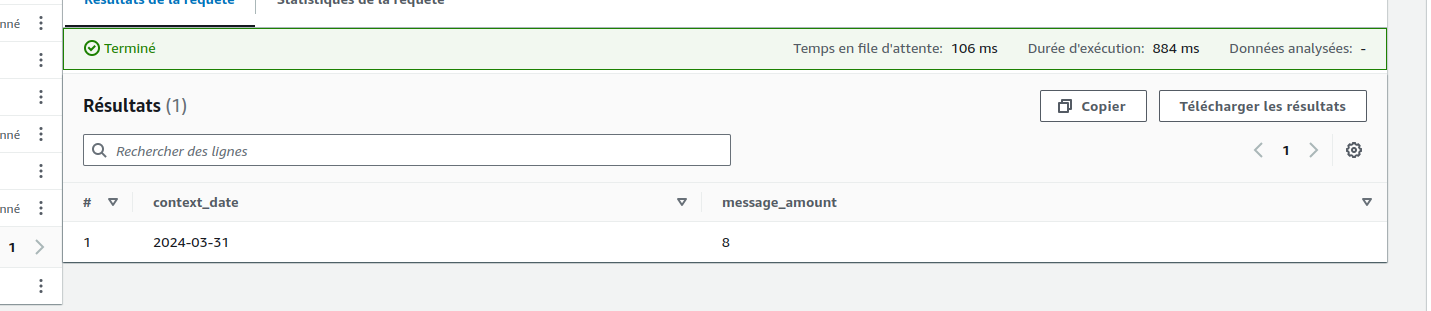

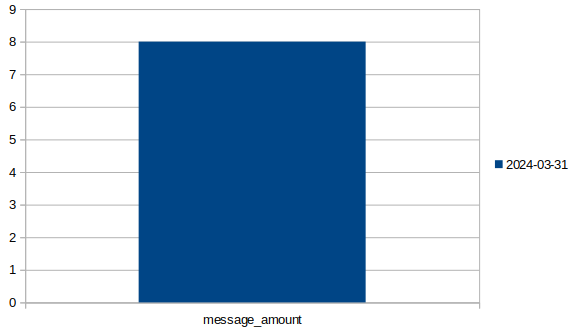

São 8 mensagens enviadas, mas por apenas 1 dia.

- Quantidade de mensagens por usuário por dia.

```sql
SELECT
  user_id,
  user_first_name,
  context_date,
  count(1) AS "message_amount"
FROM "telegram"
GROUP BY
  user_id,
  user_first_name,
  context_date
ORDER BY context_date DESC
```

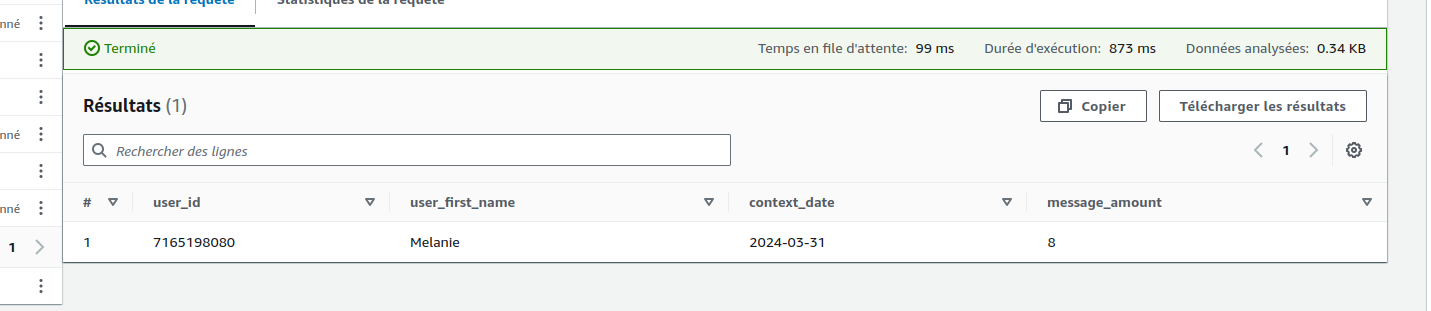

Só existe uma pessoa chamada Mélanie que comentou no Telegram.

- Média do tamanho das mensagens por usuário por dia.

```sql
SELECT
  user_id,
  user_first_name,
  context_date,
  CAST(AVG(length(text)) AS INT) AS "average_message_length"
FROM "telegram"
GROUP BY
  user_id,
  user_first_name,
  context_date
ORDER BY context_date DESC
```

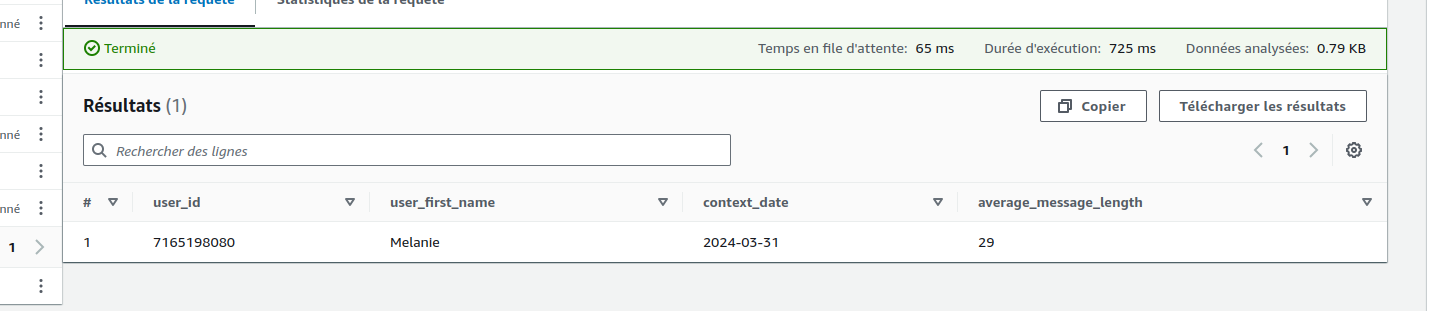

Média do tamanho das mensagens por usuário por dia è 29s

- Quantidade de mensagens por hora por dia da semana por número da semana.

```sql
WITH
parsed_date_cte AS (
    SELECT
        *,
        CAST(date_format(from_unixtime("date"),'%Y-%m-%d %H:%i:%s') AS timestamp) AS parsed_date
    FROM "telegram"
),
hour_week_cte AS (
    SELECT
        *,
        EXTRACT(hour FROM parsed_date) AS parsed_date_hour,
        EXTRACT(dow FROM parsed_date) AS parsed_date_weekday,
        EXTRACT(week FROM parsed_date) AS parsed_date_weeknum
    FROM parsed_date_cte
)
SELECT
    parsed_date_hour,
    parsed_date_weekday,
    parsed_date_weeknum,
    count(1) AS "message_amount"
FROM hour_week_cte
GROUP BY
    parsed_date_hour,
    parsed_date_weekday,
    parsed_date_weeknum
ORDER BY
    parsed_date_weeknum,
    parsed_date_weekday
```

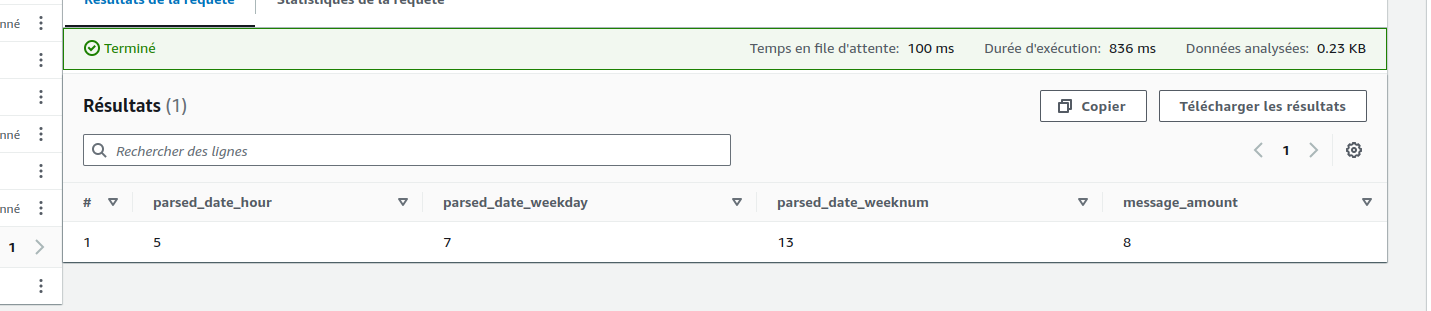

São 8 mensagens feitas no domingo bem cedo pela manhã durante a semana 13



* A análise realizada mapeou os hábitos/comportamentos dos usuários que utilizam o chatbot (dia da semana, horário do dia e época do ano). Isso permite que você obtenha informações valiosas.


## 6\. Conclusão

Usar chatbots e analisar os dados extraídos por meio de um pipeline é muito útil para empresas de todos os tamanhos e em diversos setores.

Ele permite que você responda a muitas perguntas, como:
- Os utilizadores/clientes têm pedidos específicos para um período específico? (por exemplo, um problema de Internet que ocorreu após uma tempestade)
-Vimos alguma questão levantada por diferentes utilizadores/clientes num período semelhante? (exemplo: um usuário querendo entender sua fatura após um aumento de preço)
-O tempo de processamento para o usuário/cliente é aceitável? (exemplo: um usuário insatisfeito que espera muito tempo por informações sobre um produto/serviço, podendo perder vendas)...

Os chatbots facilitam, portanto, a interação entre clientes e empresas.
Eles permitem que você resolva problemas / tire dúvidas através do seu smartphone / web sem ter que ir a uma loja / entrar em contato diretamente com um especialista da empresa.
Os dados extraídos dessas interações são informações valiosas para a tomada de decisão dos gestores a fim de melhorar os resultados (satisfação do cliente-resultados financeiros, etc.)